# Demo Code

In [1]:
#import but shorten the name
import pandas as pd
import geopandas as gpd

import pickle

#when we just need to import one function
from pathlib import Path

## Pandas Demo

### Read CSV

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

# to export
# iris.to_csv('filepath')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Multiple ways to select columns
`iris['sepal_length']` = Use when retrieving full column(s)\
`iris.loc[:,'sepal_length']` = Use when selecting a list of rows + columns \
`iris.iloc[0,0]` = Use when positional indexing is needed 

In [3]:
iris['sepal_length']

#if grabbing two or more be sure to store column names in a list []
iris[['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Subsetting

In [4]:
# creates a list of true/false
mask = iris['sepal_length'] > 5

# that can then be used to subset the data
iris[mask]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Summary Stats

In [5]:
iris['sepal_length'].describe()
iris['sepal_length'].mean()
# .min(), .max()

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Grouping

In [6]:
#find the max sepal length for each species
iris.groupby('species')['sepal_length'].max()

species
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal_length, dtype: float64

### Table Joins

In [7]:
# for example lets split the data up
df1 = iris[['sepal_length','species']]
df2 = iris[['petal_width','petal_length']]

# the common feature in both is the index but we could also join on columns
pd.merge(df1,df2,left_index=True,right_index=True)

,sepal_length,species,petal_width,petal_length
0,5.1,setosa,0.2,1.4
1,4.9,setosa,0.2,1.4
2,4.7,setosa,0.2,1.3
3,4.6,setosa,0.2,1.5
4,5.0,setosa,0.2,1.4
...,...,...,...,...
145,6.7,virginica,2.3,5.2
146,6.3,virginica,1.9,5.0
147,6.5,virginica,2.0,5.2
148,6.2,virginica,2.3,5.4


# Geopandas Demo
---

In [8]:
filepath = Path.home() / "Documents/GitHub/BikewaySimDev/Data"

# import geojson and gpkg files
groceries = gpd.read_file(filepath/"groceries.geojson")
buildings = gpd.read_file(filepath/"buildings.geojson")
streets = gpd.read_file(filepath/"networks/final_network.gpkg",layer="links")

In [9]:
#projections
crs = "epsg:2226"
groceries.to_crs(crs,inplace=True)
buildings.to_crs(crs,inplace=True)

In [10]:
#getting centroids
groceries.centroid

0    POINT (6636064.939 1962064.293)
1    POINT (6637972.035 1966212.546)
2    POINT (6640258.308 1959032.260)
3    POINT (6628437.542 1966592.583)
4    POINT (6648603.782 1962310.872)
5    POINT (6622571.614 1963842.706)
6    POINT (6629877.972 1961026.714)
7    POINT (6630939.976 1965710.426)
8    POINT (6638963.459 1963220.983)
dtype: geometry

<AxesSubplot: >

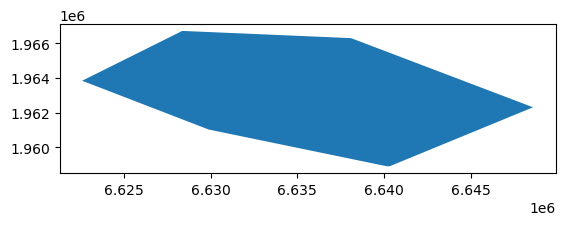

In [11]:
#getting dissolve + convex hull
groceries.dissolve().convex_hull.plot()

In [12]:
#create leaflet map with folium
groceries.centroid.explore()

## Pickle Demo

In [13]:
with (filepath/'groceries.pkl').open('wb') as fh:
    pickle.dump(groceries,fh)

# Network Analysis / Routing Demo
---

In [14]:
import networkx as nx
from helper_functions import snap_to_network
from bikewaysim_lite import create_graph
import osmnx as ox
from shapely.ops import MultiLineString

from tqdm import tqdm

In [15]:
groceries = gpd.read_file(filepath/"groceries.geojson").to_crs(crs)
buildings = gpd.read_file(filepath/"buildings.geojson").to_crs(crs)
links = gpd.read_file(filepath/"networks/final_network.gpkg",layer="links")
nodes = gpd.read_file(filepath/"networks/final_network.gpkg",layer="nodes")

In [16]:
groceries.columns
groceries = groceries[['id','name','geometry']]

In [17]:
buildings.columns
buildings = buildings[['id','geometry']]

In [18]:
crs = "epsg:2226"
groceries.geometry = groceries.centroid
buildings.geometry = buildings.centroid

In [19]:
snapped_groceries = snap_to_network(groceries,nodes)
snapped_groceries

snapping took 0.01 minutes


,id,name,N,dist
0,way/25366944,Davis Food Cooperative,2589920327,221.691955
1,way/36921187,Nugget Markets,95715676,201.180243
2,way/253731115,Safeway,11284376772,160.397837
3,way/253731412,Safeway,367130897,381.117555
4,node/597045822,Nugget Markets,95710207,191.819064
5,node/711012114,Westlake IGA Market,8914925029,187.212183
6,node/1052335476,Trader Joe's,9138982579,100.889133
7,node/2188177617,Savemart,565042013,182.972667
8,node/7352799822,Grocery Outlet,5444858697,248.356560


In [20]:
snapped_buildings = snap_to_network(buildings,nodes)
snapped_buildings

snapping took 0.01 minutes


,id,N,dist
0,relation/308691,559735588,145.580332
1,relation/308692,559726570,141.792808
2,relation/308741,367776739,156.853193
3,relation/3380555,7352799824,147.806232
4,relation/5860755,95713442,221.499597
...,...,...,...
7480,way/1219780019,8508474108,74.641432
7481,way/1221114265,95711590,87.685670
7482,way/1221396694,272269910,70.930583
7483,way/1221447497,95718034,200.858888


In [21]:
links[['A','B']].drop_duplicates(inplace=True)

# create an impedance/weight/cost column
links['length_ft'] = links.length

# if multiple edges between nodes, only use the one with the lower weight
links = links.loc[links.groupby(['A','B'])['length_ft'].idxmin()]

# make the start and end node the new index
links.index = tuple(zip(links['A'],links['B']))

c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:

# turn links into graph network
G = create_graph(links,'length_ft')

In [23]:
# now we can do shortest path routing
o = 559735588
d = 8914925029
impedance, path = nx.single_source_dijkstra(G,o,d,weight='length_ft')
edge = [(path[i],path[i+1]) for i in range(len(path)-1)]
links.loc[edge,:].explore('highway')

In [26]:
# find shortest distance and path from each origin to each grocery store
results = {}

for o in tqdm(snapped_buildings['N'].unique()):
    for d in snapped_groceries['N'].unique():
        impedance, node_list = nx.single_source_dijkstra(G,o,d,weight='length_ft')
        edge_list = [(node_list[i],node_list[i+1]) for i in range(len(node_list)-1)]
        try:
            edge_geos = MultiLineString(links.loc[edge_list,'geometry'])
        except:
            print(edge_list)
            edge_geos = None
        results[(o,d)] = {'impedance':impedance,'edge_geos':edge_geos}

 32%|███▏      | 658/2076 [02:26<04:32,  5.20it/s]

[]


 47%|████▋     | 979/2076 [03:33<03:39,  5.00it/s]

[]


 71%|███████   | 1477/2076 [05:18<02:04,  4.83it/s]

[]


100%|██████████| 2076/2076 [07:29<00:00,  4.62it/s]


In [27]:
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df

c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\io\formats\printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
c

impedance  \
559735588 2589920327    7373.203151   
          95715676     12968.880704   
          11284376772  13498.772829   
          367130897     6319.422622   
          95710207     22566.983175   
...                             ...   
272269910 95710207      5197.164883   
          8914925029   27551.190959   
          9138982579   18695.676359   
          565042013    20535.261157   
          5444858697   11104.788295   

                                                               edge_geos  
559735588 2589920327   (LINESTRING (6629784.447697169 1961136.4509158...  
          95715676     (LINESTRING (6629784.447697169 1961136.4509158...  
          11284376772  (LINESTRING (6629784.447697169 1961136.4509158...  
          367130897    (LINESTRING (6629784.447697169 1961136.4509158...  
          95710207     (LINESTRING (6629784.447697169 1961136.4509158...  
...                                                                  ...  
272269910 95710207     (LINESTRING (6646093.937511528 1960161.2672147...  
          8914925029   (LINESTRING (6646093.937511528 1960161.2672147...  
          9138982579   (LINESTRING (6646093.937511528 1960161.2672147...  
          565042013    (LINESTRING (6646093.937511528 1960161.2672147...  
          5444858697   (LINESTRING (6646093.937511528 1960161.2672147...  

[18684 rows x 2 columns]